In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression

In [2]:
data = pd.read_csv("diabetes_risk_prediction_dataset.csv")
data

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative


In [3]:
data.replace({'Yes':1,'No':0},inplace =True)

In [4]:
data.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,0,1,0,1,0,0,0,1,0,1,0,1,1,1,Positive
1,58,Male,0,0,0,1,0,0,1,0,0,0,1,0,1,0,Positive
2,41,Male,1,0,0,1,1,0,0,1,0,1,0,1,1,0,Positive
3,45,Male,0,0,1,1,1,1,0,1,0,1,0,0,0,0,Positive
4,60,Male,1,1,1,1,1,0,1,1,1,1,1,1,1,1,Positive


In [5]:
data.isnull().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

In [6]:
data.dtypes

Age                    int64
Gender                object
Polyuria               int64
Polydipsia             int64
sudden weight loss     int64
weakness               int64
Polyphagia             int64
Genital thrush         int64
visual blurring        int64
Itching                int64
Irritability           int64
delayed healing        int64
partial paresis        int64
muscle stiffness       int64
Alopecia               int64
Obesity                int64
class                 object
dtype: object

In [7]:
data['Gender']=data['Gender'].map({'Male':0,'Female':1})
data.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,0,0,1,0,1,0,0,0,1,0,1,0,1,1,1,Positive
1,58,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,Positive
2,41,0,1,0,0,1,1,0,0,1,0,1,0,1,1,0,Positive
3,45,0,0,0,1,1,1,1,0,1,0,1,0,0,0,0,Positive
4,60,0,1,1,1,1,1,0,1,1,1,1,1,1,1,1,Positive


In [8]:
x =data.drop('class',axis=1)
y =data['class']

In [9]:
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.2,random_state=6)

In [10]:
model =LogisticRegression()
model.fit(x_train,y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [11]:
model.score(x_train,y_train)

0.9254807692307693

In [12]:
model.score(x_test,y_test)

0.9519230769230769

In [13]:
y_pred = model.predict(x_test)

In [14]:
pd.DataFrame({'True values':y_test,'Predicted values':y_pred})

,True values,Predicted values
56,Positive,Positive
484,Positive,Positive
10,Positive,Positive
451,Positive,Positive
17,Positive,Positive
...,...,...
438,Positive,Positive
46,Positive,Positive
208,Negative,Negative
90,Positive,Positive


In [15]:
accuracy_score(y_test,y_pred)

0.9519230769230769

In [16]:
cm =confusion_matrix(y_test,y_pred)
cm

array([[42,  2],
       [ 3, 57]], dtype=int64)

Text(33.0, 0.5, 'True values')

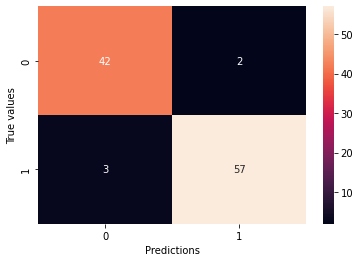

In [17]:
sns.heatmap(cm,annot=True)
plt.xlabel("Predictions")
plt.ylabel("True values")

#### Classification Report

In [19]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

    Negative       0.93      0.95      0.94        44
    Positive       0.97      0.95      0.96        60

    accuracy                           0.95       104
   macro avg       0.95      0.95      0.95       104
weighted avg       0.95      0.95      0.95       104



In [22]:
model.predict([[54,1,1,0,0,0,0,1,1,0,1,0,0,1,1,1]])

array(['Positive'], dtype=object)